<a href="https://colab.research.google.com/github/satyamnewale/numpy-notebooks/blob/main/linear_regression_from_scratch_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Closed-form beta:
 [[3.21509616]
 [1.95402268]]
Closed-form MSE: 0.8065845639670534
LR 0.001 | Iter 0 | Loss: 163.5230
LR 0.001 | Iter 500 | Loss: 2.1287
LR 0.001 | Iter 1000 | Loss: 1.5657
LR 0.001 | Iter 1500 | Loss: 1.2424

Learning Rate: 0.001

Iterations: 2000
GD weights:
 [[2.27568855]
 [2.09840803]]
MSE (GD): 1.0571153296813993
Difference from closed-form:
 [[-0.93940761]
 [ 0.14438535]]
LR 0.001 | Iter 0 | Loss: 161.9210
LR 0.001 | Iter 500 | Loss: 2.1330
LR 0.001 | Iter 1000 | Loss: 1.5682
LR 0.001 | Iter 1500 | Loss: 1.2439
LR 0.001 | Iter 2000 | Loss: 1.0576
LR 0.001 | Iter 2500 | Loss: 0.9507
LR 0.001 | Iter 3000 | Loss: 0.8894

Learning Rate: 0.001

Iterations: 3500
GD weights:
 [[2.80572751]
 [2.01694194]]
MSE (GD): 0.8541599226927541
Difference from closed-form:
 [[-0.40936865]
 [ 0.06291927]]
LR 0.001 | Iter 0 | Loss: 166.4432
LR 0.001 | Iter 500 | Loss: 2.1199
LR 0.001 | Iter 1000 | Loss: 1.5607
LR 0.001 | Iter 1500 | Loss: 1.2396
LR 0.001 | Iter 2000 | Loss: 1.0552
LR

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3437285056.py:42: RuntimeWarning: overflow encountered in square
  loss = np.mean((Y - (X_design @ w))**2)
/tmp/ipython-input-3437285056.py:40: RuntimeWarning: overflow encountered in matmul
  g = (2/n)*X_design.T@(y_hat-Y)
/tmp/ipython-input-3437285056.py:41: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * g


LR 0.05 | Iter 1000 | Loss: nan
LR 0.05 | Iter 1500 | Loss: nan
LR 0.05 | Iter 2000 | Loss: nan
LR 0.05 | Iter 2500 | Loss: nan
LR 0.05 | Iter 3000 | Loss: nan

Learning Rate: 0.05

Iterations: 3500
GD weights:
 [[nan]
 [nan]]
MSE (GD): nan
Difference from closed-form:
 [[nan]
 [nan]]
LR 0.05 | Iter 0 | Loss: 873.2945
LR 0.05 | Iter 500 | Loss: inf
LR 0.05 | Iter 1000 | Loss: nan
LR 0.05 | Iter 1500 | Loss: nan
LR 0.05 | Iter 2000 | Loss: nan
LR 0.05 | Iter 2500 | Loss: nan
LR 0.05 | Iter 3000 | Loss: nan
LR 0.05 | Iter 3500 | Loss: nan
LR 0.05 | Iter 4000 | Loss: nan
LR 0.05 | Iter 4500 | Loss: nan

Learning Rate: 0.05

Iterations: 5000
GD weights:
 [[nan]
 [nan]]
MSE (GD): nan
Difference from closed-form:
 [[nan]
 [nan]]


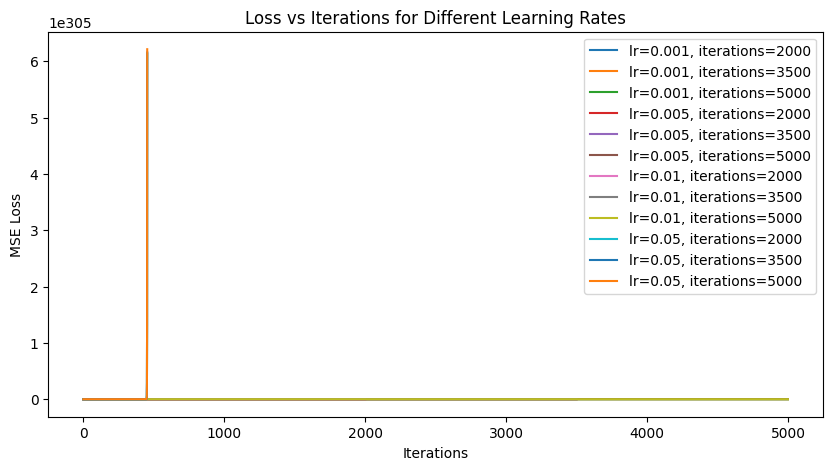


 Best learning rate: 0.01, iterations: 3500
 Final MSE (best run): 0.806585
Convergence improvement: 97.12%


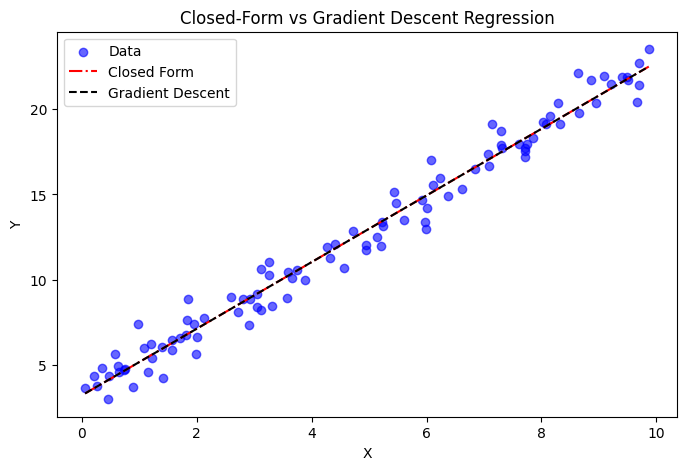

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#1. generate synthetic linear data
np.random.seed(42)
X =np.random.rand(100,1)*10

# slope and constant
a=2
b=3

#generate noise
noise = np.random.randn(100,1)

#generate target value
Y = a*X + b + noise

#2. Design matix (add intercept column)
X_design = np.hstack((np.ones((100, 1)), X))
isValid = X_design.T @ X_design
n = len(X_design)

#3. Closed-form solution (Normal Equation)
beta = np.linalg.inv(isValid)@X_design.T@Y
y_pred_closed = X_design @ beta

# MSE
MSE_closed = np.mean((Y-y_pred_closed)**2)

print("Closed-form beta:\n", beta)
print("Closed-form MSE:", MSE_closed)

#Gradient Descent Implementation
def gradient_descent(X_design, Y, lr, n_iters):
  w = np.random.randn(2,1)*0.01
  losses = []

  for i in range(n_iters):
    y_hat = X_design @ w
    error = y_hat - Y
    g = (2/n)*X_design.T@(y_hat-Y)
    w = w - lr * g
    loss = np.mean((Y - (X_design @ w))**2)
    losses.append(loss)
    if i % 500 == 0:
      print(f"LR {lr} | Iter {i} | Loss: {loss:.4f}")
  return w, losses

#learning rate and losses store
learning_rates = [0.001, 0.005, 0.01, 0.05]
plt.figure(figsize=(10, 5))
n_iterations = [2000,3500,5000]

best_loss = float('inf')
best_params = None
best_w = None
best_losses = None

#iteration
for lr in learning_rates:
    for n_iters in n_iterations:
      w, losses = gradient_descent(X_design, Y, lr, n_iters)

      final_loss = losses[-1]

      if final_loss < best_loss:
        best_loss = final_loss
        best_params = (lr, n_iters)
        best_w = w
        best_losses = losses

      plt.plot(losses, label=f"lr={lr}, iterations={n_iters}")
      print(f"\nLearning Rate: {lr}")
      print(f"\nIterations: {n_iters}")
      print("GD weights:\n", w)
      print("MSE (GD):", np.mean((Y - (X_design @ w)) ** 2))
      print("Difference from closed-form:\n", w - beta)

plt.title("Loss vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

#6️. Final comparison plot (best LR)
best_lr, best_iters = best_params
print(f"\n Best learning rate: {best_lr}, iterations: {best_iters}")
print(f" Final MSE (best run): {best_loss:.6f}")

w_best = best_w
y_pred_gd = X_design @ w_best

# Convergence metric
convergence_rate = (best_losses[0] - best_losses[-1]) / best_losses[0]
print(f"Convergence improvement: {convergence_rate*100:.2f}%")

# Sorted plotting for clean lines
sorted_idx = np.argsort(X.flatten())

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', alpha=0.6, label="Data")
plt.plot(X[sorted_idx], y_pred_closed[sorted_idx], color='red',linestyle='-.', label="Closed Form")
plt.plot(X[sorted_idx], y_pred_gd[sorted_idx], color='black', linestyle='--', label="Gradient Descent")
plt.title("Closed-Form vs Gradient Descent Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
